<a href="https://colab.research.google.com/github/Priyanka2508/Rating-Prediction_Sentimental-Analysis_EDA/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install -U scikit-learn

# **1. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix, precision_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import xgboost
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!pip install google-colab
!pip install pydrive

# **2. Read and Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
col_names = ['target','id','date','flag','user','text']
df = pd.read_csv('/content/drive/MyDrive/twitter_new.csv',names = col_names, encoding='latin1')


In [ ]:
df.head(10)

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
df.tail(10)

,target,id,date,flag,user,text
1599990,4,2193579249,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,razzberry5594,WOOOOO! Xbox is back
1599991,4,2193579284,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,AgustinaP,@rmedina @LaTati Mmmm That sounds absolutely ...
1599992,4,2193579434,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,sdancingsteph,ReCoVeRiNg FrOm ThE lOnG wEeKeNd
1599993,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS
1599994,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha..."
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


# **3. Preprocessing the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.isna().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [ ]:
df['target']= df['target'].replace(4,1)
df['target'].value_counts()

0    717211
1    693889
Name: target, dtype: int64

In [ ]:
df['tidy_text'] = df['text'].str.lower()

In [ ]:
# remove URLs
def remove_pattern(input_txt, pattern):
    return re.sub(pattern, '', input_txt)

# Apply the function to remove URLs
df['tidy_text'] = df['tidy_text'].apply(remove_pattern, pattern=r'http\S+|www\S+|https\S+')
df.head()

,target,id,date,flag,user,text,tidy_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",@switchfoot - a that's a bummer. you shoulda...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@kenichan i dived many times for the ball. man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [ ]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
# remove twitter handles
df['tidy_text'] = np.vectorize(remove_pattern)(df['tidy_text'], "@[\w]*")
df['tidy_text'].head()

0      - a that's a bummer.  you shoulda got david ...
1    is upset that he can't update his facebook by ...
2     i dived many times for the ball. managed to s...
3      my whole body feels itchy and like its on fire 
4     no, it's not behaving at all. i'm mad. why am...
Name: tidy_text, dtype: object

In [ ]:
# remove special characters, numbers and punctuations
df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")
df.head()

<ipython-input-11-856fba643b71>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_text'] = df['tidy_text'].str.replace("[^a-zA-Z#]", " ")


,target,id,date,flag,user,text,tidy_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a that s a bummer you shoulda got david ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no it s not behaving at all i m mad why am...


In [ ]:
# remove short words
df['tidy_text'] = df['tidy_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,target,id,date,flag,user,text,tidy_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",that bummer shoulda david carr third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update facebook texting might resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving here because over there


In [ ]:
stop_words = stopwords.words("english")
stop_words.extend(['',' ','a','e','i','o','t','n','s','r','l','mm'])
def stop(word):
  filtered_text = [w for w in word.split() if not w in stop_words]
  return " ".join(filtered_text)


In [ ]:
df['tidy_text']= df['tidy_text'].apply(stop)
df.head()

,target,id,date,flag,user,text,tidy_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",bummer shoulda david carr third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save rest bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behaving


In [ ]:
# individual words considered as tokens
tokenized_tweet = df['tidy_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [bummer, shoulda, david, carr, third]
1    [upset, update, facebook, texting, might, resu...
2    [dived, many, times, ball, managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4                                           [behaving]
Name: tidy_text, dtype: object

In [ ]:
df.drop_duplicates(subset=['tidy_text'], keep = 'first',inplace= True)

In [ ]:
df.shape

(1411100, 7)

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0                [bummer, shoulda, david, carr, third]
1    [upset, updat, facebook, text, might, result, ...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                                              [behav]
Name: tidy_text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# stem the words
lemm = nltk.WordNetLemmatizer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [lemm.lemmatize(word) for word in sentence])
tokenized_tweet.head()

0                [bummer, shoulda, david, carr, third]
1    [upset, updat, facebook, text, might, result, ...
2    [dive, mani, time, ball, manag, save, rest, bo...
3               [whole, bodi, feel, itchi, like, fire]
4                                              [behav]
Name: tidy_text, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['tidy_text'] = tokenized_tweet
df.head()

,target,id,date,flag,user,text,tidy_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",bummer shoulda david carr third
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might result school ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive mani time ball manag save rest bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behav


# **4. Data Visualization**

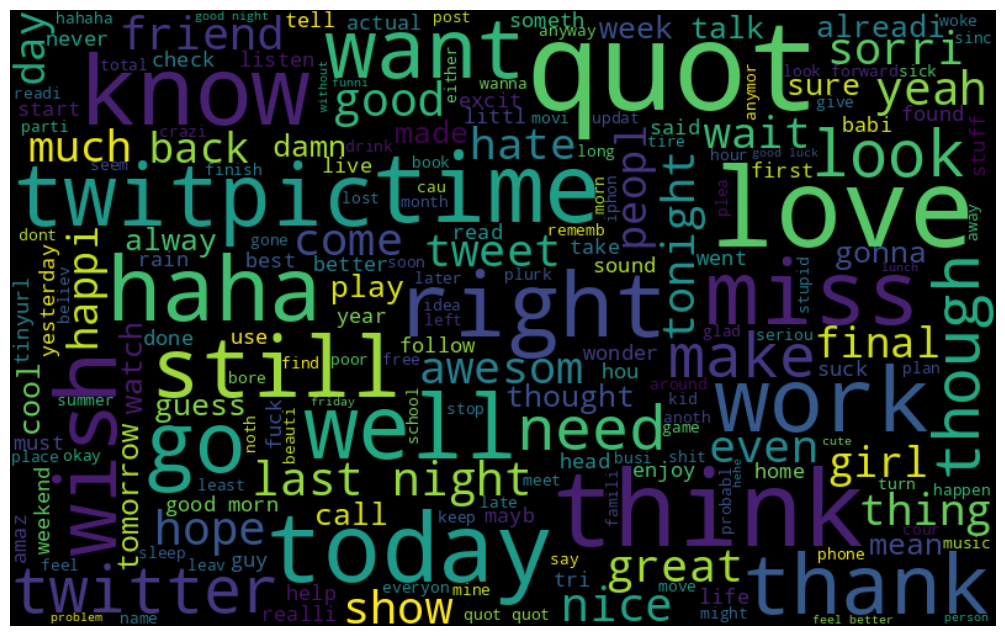

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['tidy_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

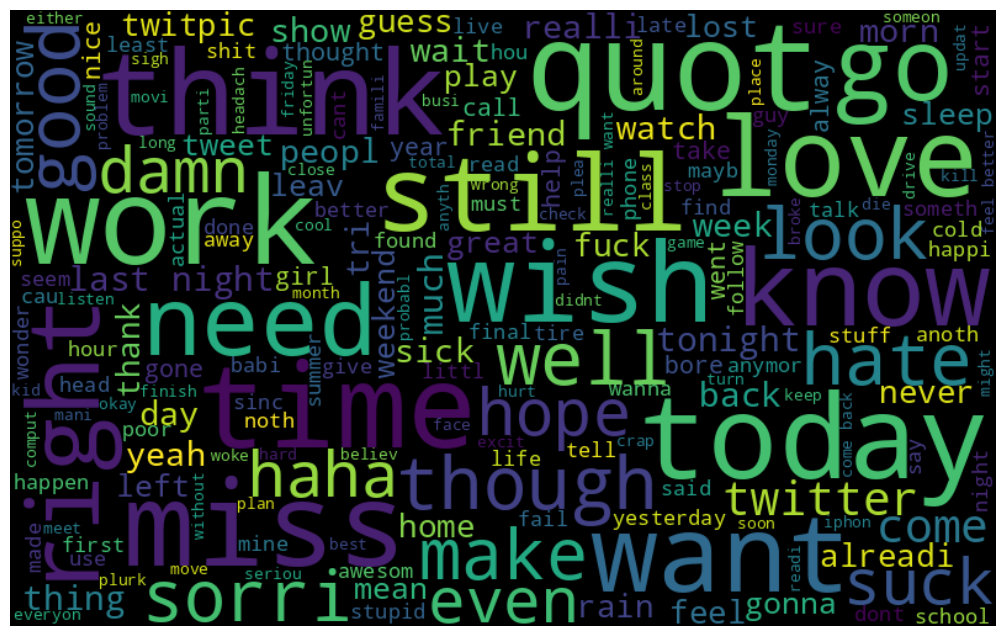

In [ ]:
# frequent words visualization for negtaive
all_words = " ".join([sentence for sentence in df['tidy_text'][df['target']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

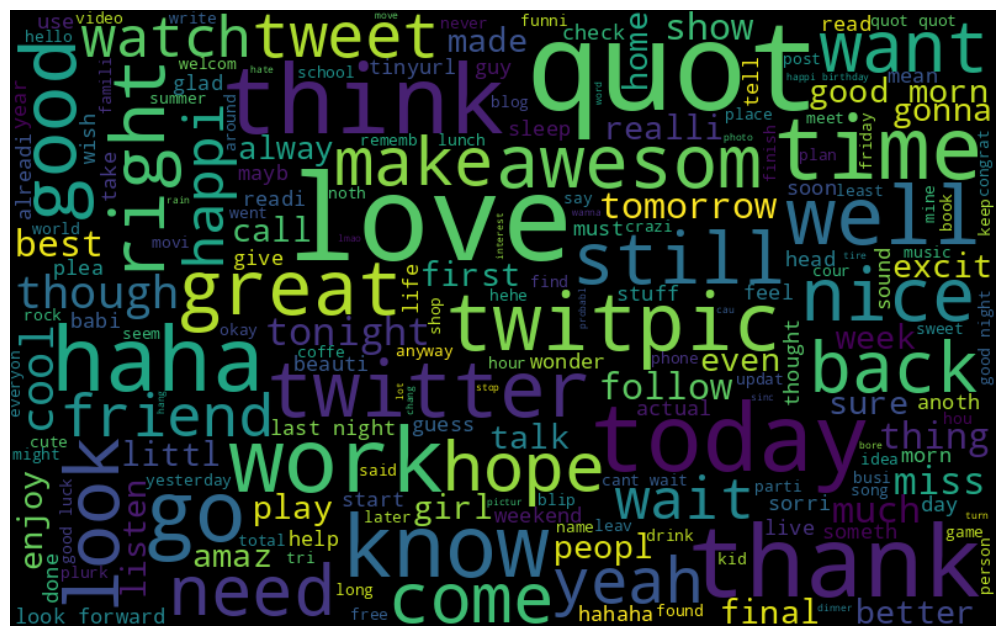

In [ ]:
# frequent words visualization for postive
all_words = " ".join([sentence for sentence in df['tidy_text'][df['target']== 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['tidy_text'][df['target']==1])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['tidy_text'][df['target']==0])

In [ ]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,5
3,skype,3
4,explet,1


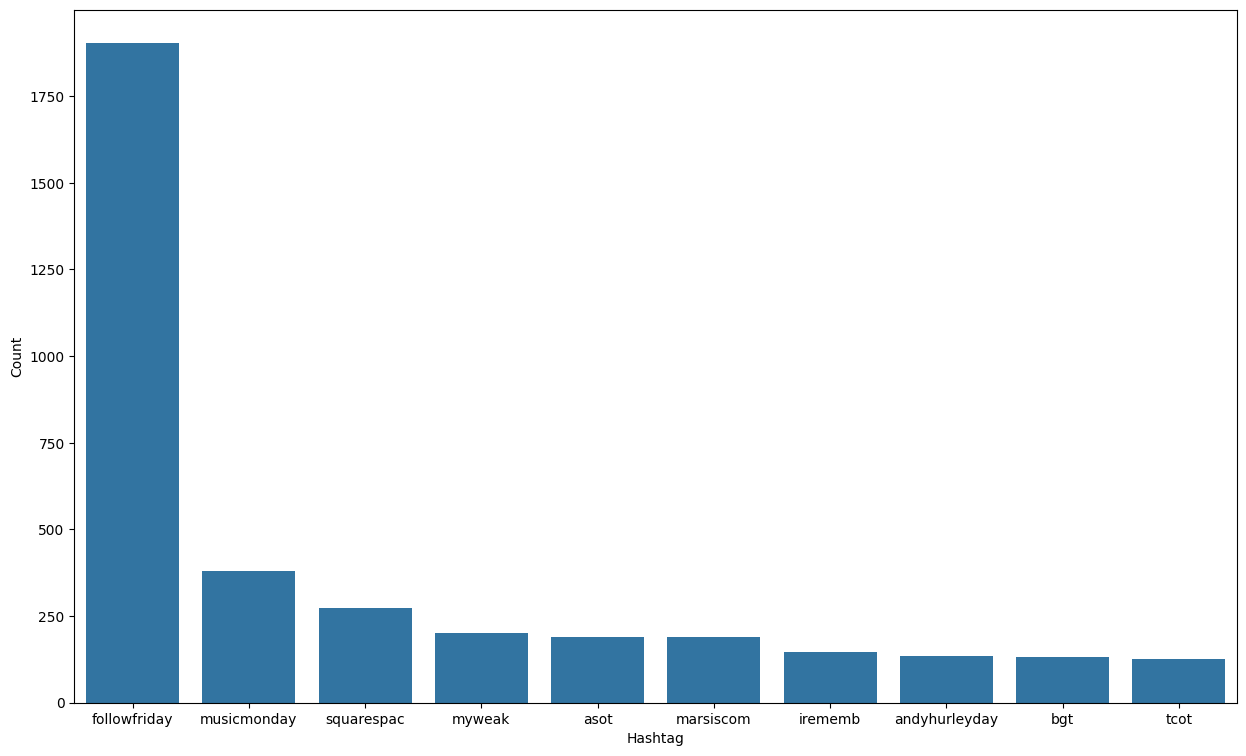

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


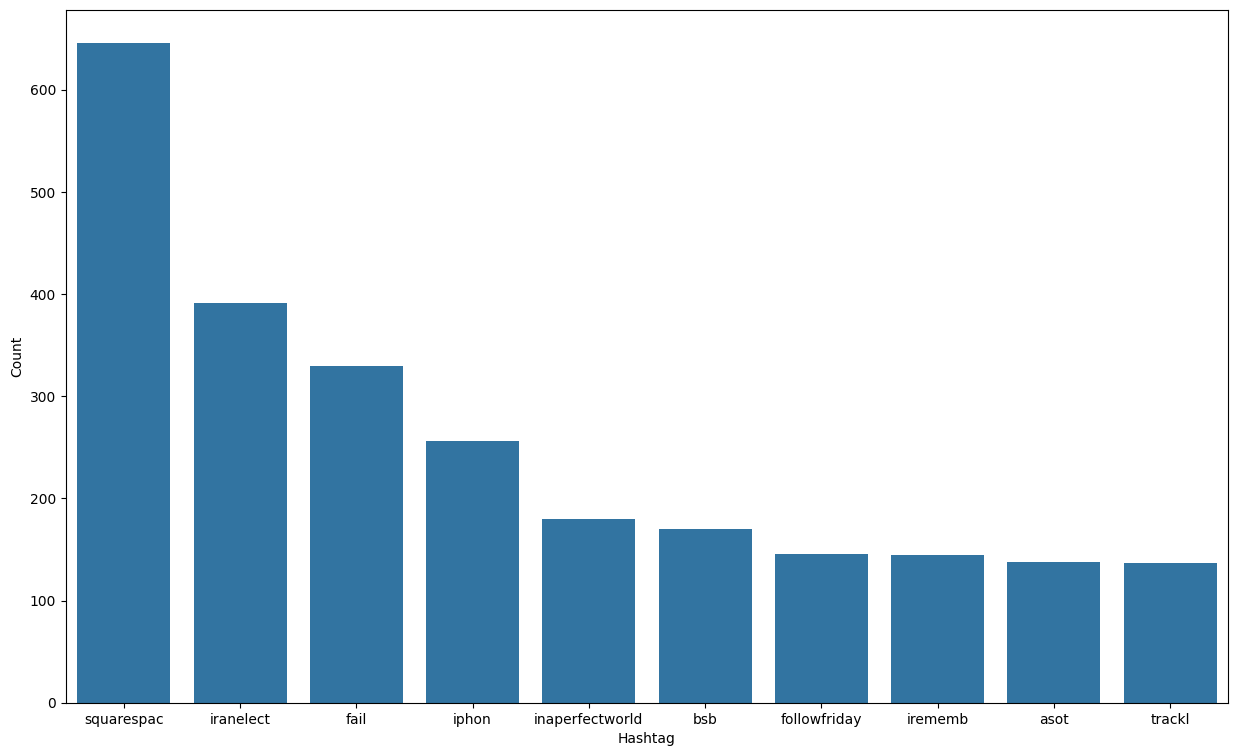

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# **INPUT**

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['tidy_text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['target'],stratify = df['target'], random_state=42, test_size=0.25)

# **MODEL BUILDING AND EVALUATION**

In [ ]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# **MODEL 1**

              precision    recall  f1-score   support

           0       0.75      0.68      0.72    179303
           1       0.70      0.76      0.73    173472

    accuracy                           0.72    352775
   macro avg       0.73      0.72      0.72    352775
weighted avg       0.73      0.72      0.72    352775



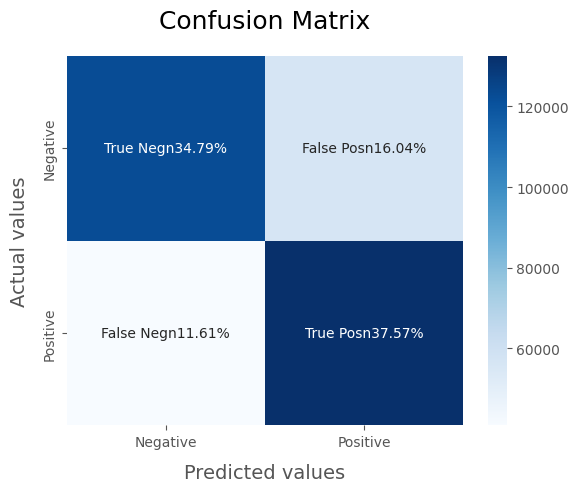

In [ ]:
LRmodel = LogisticRegression(C = 10, max_iter = 500, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

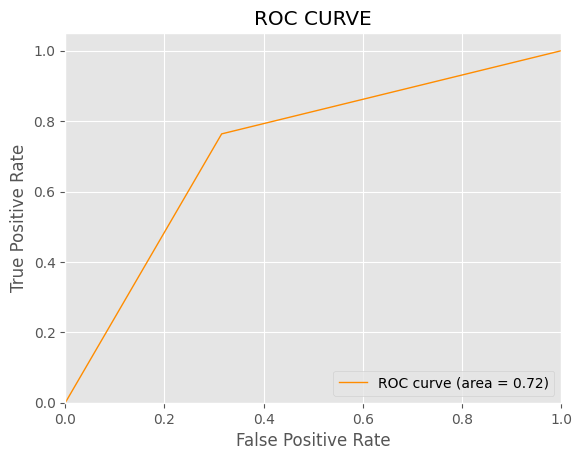

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid={'C':[2,5,7, 10,15]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [2, 5, 7, 10, 15]})

In [ ]:
# Create and fit the logistic regression model
logreg = LogisticRegression(C=10)
logreg.fit(X_train, y_train)

# Predict probabilities for the test set
probabilities = logreg.predict_proba(X_test)

#Prediction
predictions = logreg.predict(X_test)

In [ ]:
# Combine probabilities and predictions into a DataFrame
result_df = pd.DataFrame(np.concatenate((probabilities, predictions.reshape(-1, 1)), axis=1),
                          columns=[f'Prob_Class_{i}' for i in logreg.classes_] + ['Predicted_Class'])

# Display the DataFrame
print(result_df.head())

   Prob_Class_0  Prob_Class_1  Predicted_Class
0      0.456291      0.543709              1.0
1      0.348175      0.651825              1.0
2      0.469096      0.530904              1.0
3      0.010892      0.989108              1.0
4      0.606462      0.393538              0.0


# **MODEL 2**

              precision    recall  f1-score   support

           0       0.74      0.70      0.72    179301
           1       0.70      0.74      0.72    173470

    accuracy                           0.72    352771
   macro avg       0.72      0.72      0.72    352771
weighted avg       0.72      0.72      0.72    352771



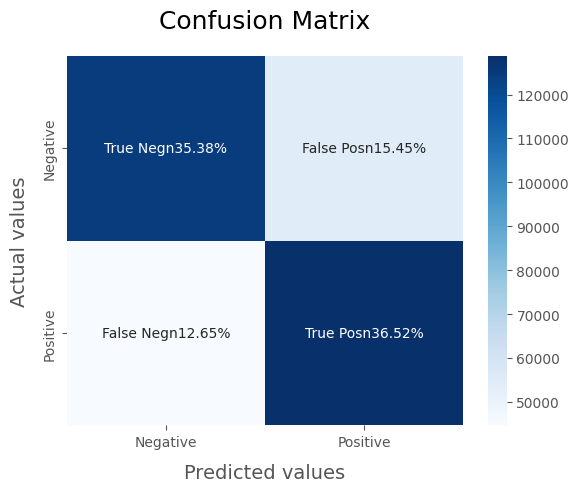

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

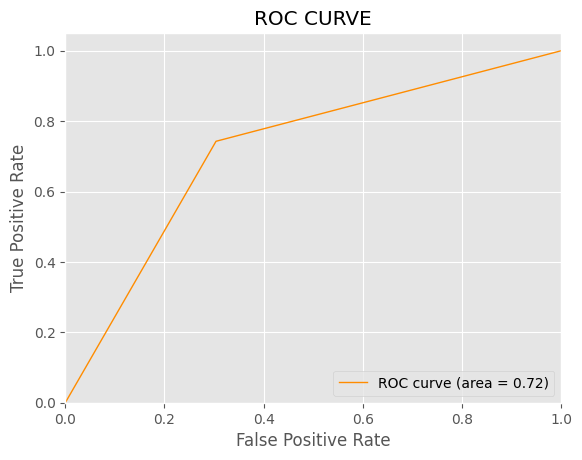

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **MODEL 3**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.75      0.68      0.71    179301
           1       0.70      0.77      0.73    173470

    accuracy                           0.72    352771
   macro avg       0.73      0.72      0.72    352771
weighted avg       0.73      0.72      0.72    352771



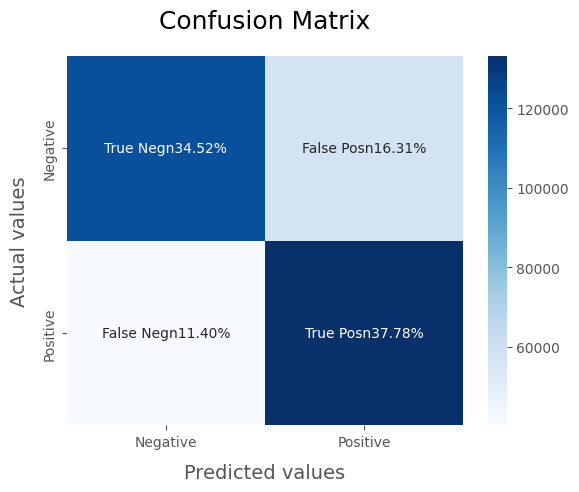

In [ ]:
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

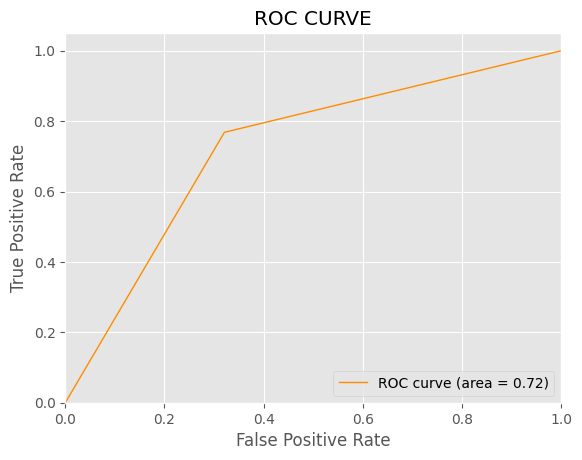

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **MODEL 4**

              precision    recall  f1-score   support

           0       0.76      0.69      0.72    179303
           1       0.71      0.77      0.74    173472

    accuracy                           0.73    352775
   macro avg       0.73      0.73      0.73    352775
weighted avg       0.73      0.73      0.73    352775



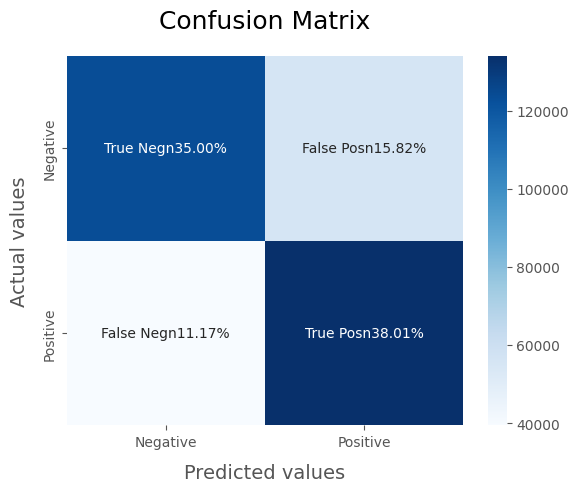

In [ ]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(n_estimators=1000, n_jobs=-1)
xgbmodel.fit(X_train, y_train)
model_Evaluate(xgbmodel)
y_pred4 = xgbmodel.predict(X_test)

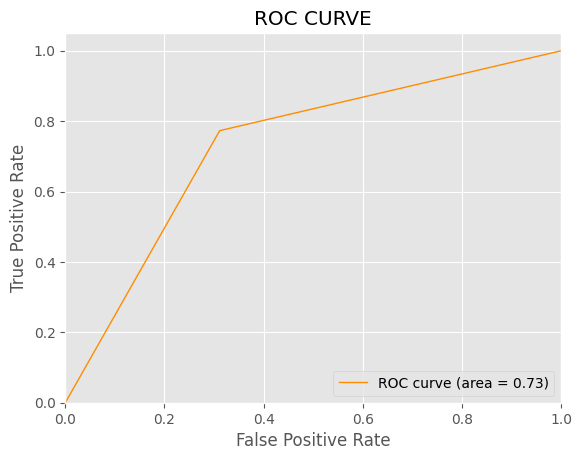

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **USING TF-IDF**

In [ ]:
bow_tfidf = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = bow_tfidf.fit_transform(df['tidy_text'])

In [ ]:
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(tfidf, df['target'],stratify = df['target'], random_state=42, test_size=0.25)

In [ ]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test_tf)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test_tf, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test_tf, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72    179303
           1       0.71      0.77      0.73    173472

    accuracy                           0.73    352775
   macro avg       0.73      0.73      0.73    352775
weighted avg       0.73      0.73      0.73    352775



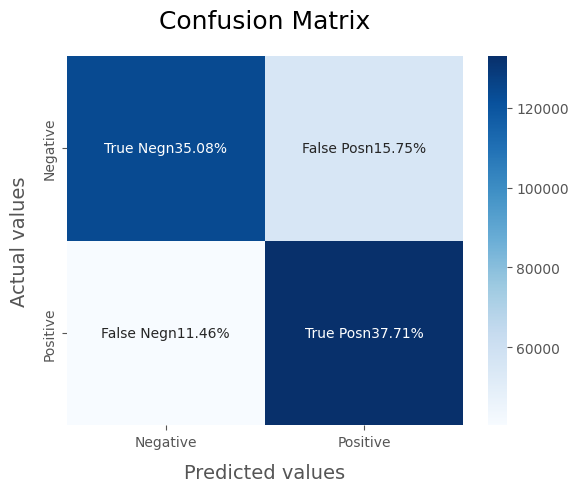

In [ ]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(n_estimators=1000, n_jobs=-1)
xgbmodel.fit(X_train_tf, y_train_tf)
model_Evaluate(xgbmodel)
y_pred5 = xgbmodel.predict(X_test_tf)

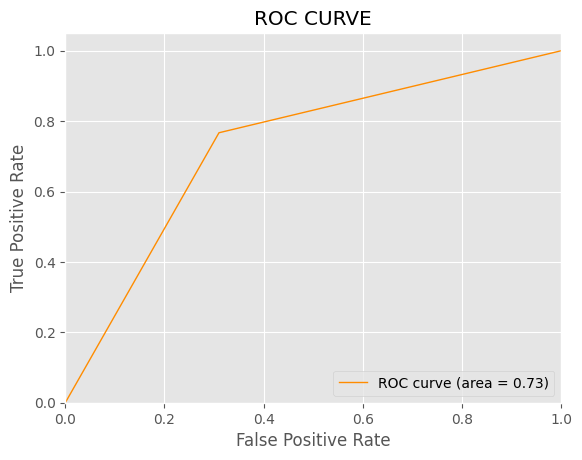

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_tf, y_pred5)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

There is no difference in the model interms of accuracy between count vectorizer and TF-IDF method.